In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:

df = pd.DataFrame()

In [3]:

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

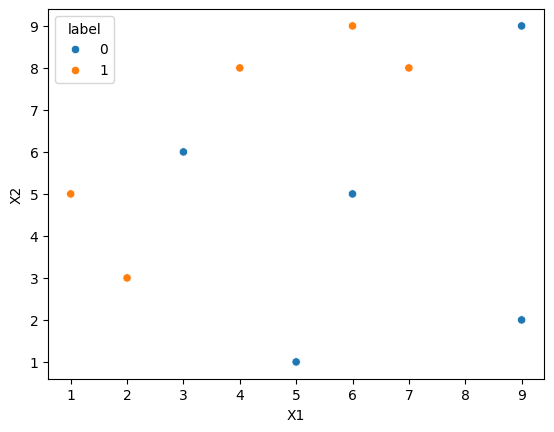

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])
     

In [6]:
df['weights']=1/df.shape[0]

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1=DecisionTreeClassifier(max_depth=1)

In [10]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [11]:
dt1.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

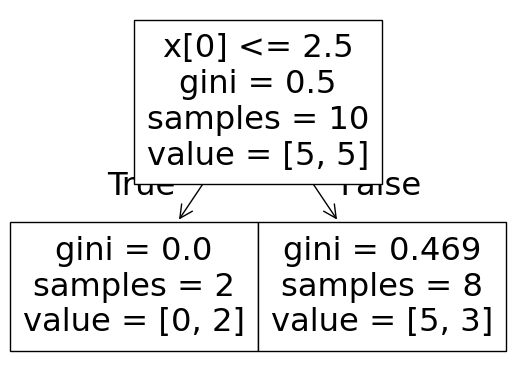

In [13]:
plot_tree(dt1)

<Axes: >

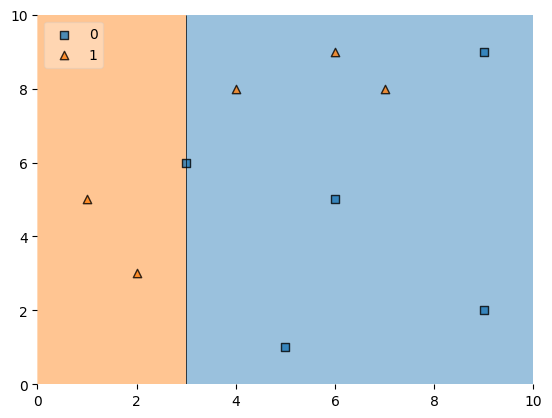

In [14]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [15]:
df['y_pred']=dt1.predict(X)

In [16]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [17]:
def cal_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [18]:
#step 3 calcullate model weight 
alpha1=cal_model_weight(0.3)

In [19]:
# weight of first row
alpha1

np.float64(0.42364893019360184)

In [20]:
#updating row weight
def update_row_weight(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']+np.exp(-alpha)
    else:
        return row['weights']+np.exp(alpha)

In [21]:
df['updated_weights']=df.apply(update_row_weight,axis=1)

In [22]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.755079
1,2,3,1,0.1,1,0.755079
2,3,6,0,0.1,0,0.755079
3,4,8,1,0.1,0,1.626534
4,5,1,0,0.1,0,0.755079
5,6,9,1,0.1,0,1.626534
6,6,5,0,0.1,0,0.755079
7,7,8,1,0.1,0,1.626534
8,9,9,0,0.1,0,0.755079
9,9,2,0,0.1,0,0.755079


In [23]:
df['updated_weights'].sum()

np.float64(10.165153319682013)

In [24]:
#  normalizing the weights as weight sum is greater than 1 
df['normalized_weight']=df['updated_weights']/df['updated_weights'].sum()

In [25]:
df['normalized_weight'].sum()

np.float64(1.0)

In [26]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weight
0,1,5,1,0.1,1,0.755079,0.074281
1,2,3,1,0.1,1,0.755079,0.074281
2,3,6,0,0.1,0,0.755079,0.074281
3,4,8,1,0.1,0,1.626534,0.160011
4,5,1,0,0.1,0,0.755079,0.074281
5,6,9,1,0.1,0,1.626534,0.160011
6,6,5,0,0.1,0,0.755079,0.074281
7,7,8,1,0.1,0,1.626534,0.160011
8,9,9,0,0.1,0,0.755079,0.074281
9,9,2,0,0.1,0,0.755079,0.074281


In [29]:
df['cumsum_upper'] = np.cumsum(df['normalized_weight'])

In [30]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weight']
     

In [31]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.755079,0.000000,0.074281
1,2,3,1,0.1,1,0.755079,0.074281,0.148562
2,3,6,0,0.1,0,0.755079,0.148562,0.222843
3,4,8,1,0.1,0,1.626534,0.222843,0.382854
4,5,1,0,0.1,0,0.755079,0.382854,0.457135
5,6,9,1,0.1,0,1.626534,0.457135,0.617146
6,6,5,0,0.1,0,0.755079,0.617146,0.691427
7,7,8,1,0.1,0,1.626534,0.691427,0.851438
8,9,9,0,0.1,0,0.755079,0.851438,0.925719
9,9,2,0,0.1,0,0.755079,0.925719,1.000000
